In [1]:
import pandas as pd
import os
import numpy as np
import openpyxl
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import ShuffleSplit
from tabulate import tabulate
import pickle
import json
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

FILE_NAME='./data/Breast_cancer_data.xls'
df = pd.read_csv('./data/Breast_cancer_data.csv')

In [2]:
total=df['diagnosis'].count()
dia1=df['diagnosis'][df.diagnosis==1].count()
dia0=df['diagnosis'][df.diagnosis==0].count()
print("Número total de filas del dataset "+ str(total) )
print("Número total de diagnosis a 0: "+ str(dia0)+"  " +str(dia0/total) )
print("Número total de diagnosis a 1: "+ str(dia1)+"  " +str(dia1/total) )
print("Null en el dataset: "+ str(df.isnull().sum().sum() ))

Número total de filas del dataset 569
Número total de diagnosis a 0: 212  0.37258347978910367
Número total de diagnosis a 1: 357  0.6274165202108963
Null en el dataset: 0


In [3]:
train, test = train_test_split(df, test_size=0.2)

In [4]:
trainn=train['diagnosis'].count()
testn=test['diagnosis'].count()
print("Número total de filas del train "+ str(trainn))
print("Número total de filas del test "+ str(testn))

Número total de filas del train 455
Número total de filas del test 114


In [5]:
corrM = train.corr()
corrM

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.358734,0.997786,0.987714,0.164672,-0.740788
mean_texture,0.358734,1.000000,0.363574,0.347559,-0.002166,-0.430766
mean_perimeter,0.997786,0.363574,1.000000,0.986894,0.202896,-0.752194
mean_area,0.987714,0.347559,0.986894,1.000000,0.177029,-0.718771
mean_smoothness,0.164672,-0.002166,0.202896,0.177029,1.000000,-0.365023
diagnosis,-0.740788,-0.430766,-0.752194,-0.718771,-0.365023,1.000000


In [6]:
#Normalización por columnas de train and test

#Obtención del máximo por columna
max_radius=train["mean_radius"].max()
max_texture=train["mean_texture"].max()
max_perimeter=train["mean_perimeter"].max()
max_area=train["mean_area"].max()
max_perimeter=train["mean_perimeter"].max()

def norm(df,max_radius,max_texture,max_perimeter,max_area):
    df_nom=df
    df_nom["mean_radius"]=df_nom["mean_radius"]/max_radius
    df_nom["mean_texture"]=df_nom["mean_texture"]/max_texture
    df_nom["mean_perimeter"]=df_nom["mean_perimeter"]/max_perimeter
    df_nom["mean_area"]=df_nom["mean_area"]/max_area
    return df_nom

df_train_nom=norm(train,max_radius,max_texture,max_perimeter,max_area)
print(df_train_nom)

df_test_nom=norm(test,max_radius,max_texture,max_perimeter,max_area)
print(df_test_nom)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
290     0.512629      0.502291        0.509443   0.260296          0.08757   
552     0.454287      0.749236        0.431565   0.203079          0.08276   
34      0.573817      0.455193        0.567639   0.322751          0.10400   
105     0.466382      0.396130        0.462653   0.211995          0.13980   
130     0.433654      0.338340        0.419523   0.182247          0.10660   
..           ...           ...             ...        ...              ...   
165     0.532551      0.503055        0.506631   0.275970          0.08421   
283     0.577730      0.477851        0.577188   0.321911          0.10660   
158     0.429029      0.324338        0.407639   0.179368          0.09311   
66      0.336713      0.534878        0.318886   0.107717          0.10440   
411     0.392743      0.428462        0.376233   0.149220          0.10770   

     diagnosis  
290          1  
552          1  
34          

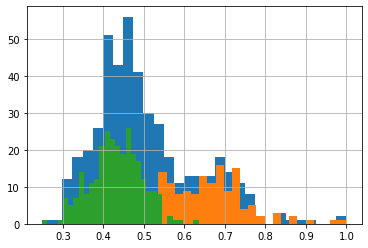

In [7]:
hist = df_train_nom["mean_radius"].hist(bins=30)
hist = df_train_nom[df_train_nom.diagnosis==0]["mean_radius"].hist(bins=30)
hist = df_train_nom[df_train_nom.diagnosis==1]["mean_radius"].hist(bins=30)

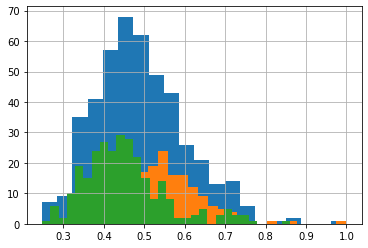

In [8]:
hist = df_train_nom["mean_texture"].hist(bins=20)
hist = df_train_nom[df_train_nom.diagnosis==0]["mean_texture"].hist(bins=30)
hist = df_train_nom[df_train_nom.diagnosis==1]["mean_texture"].hist(bins=30)

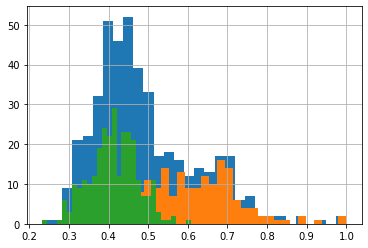

In [9]:
hist = df_train_nom["mean_perimeter"].hist(bins=30)
hist = df_train_nom[df_train_nom.diagnosis==0]["mean_perimeter"].hist(bins=30)
hist = df_train_nom[df_train_nom.diagnosis==1]["mean_perimeter"].hist(bins=30)

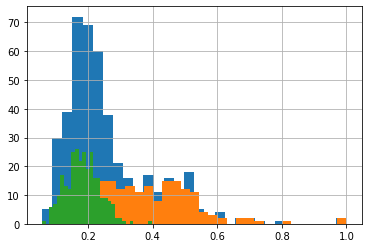

In [10]:
hist = df_train_nom["mean_area"].hist(bins=30)
hist = df_train_nom[df_train_nom.diagnosis==0]["mean_area"].hist(bins=30)
hist = df_train_nom[df_train_nom.diagnosis==1]["mean_area"].hist(bins=30)

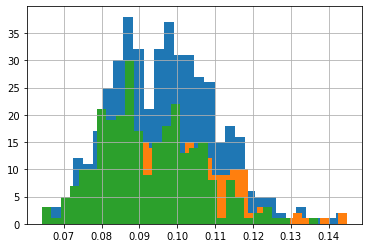

In [11]:
hist = df_train_nom["mean_smoothness"].hist(bins=30)
hist = df_train_nom[df_train_nom.diagnosis==0]["mean_smoothness"].hist(bins=30)
hist = df_train_nom[df_train_nom.diagnosis==1]["mean_smoothness"].hist(bins=30)

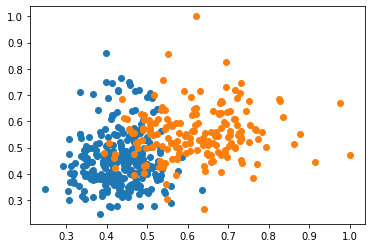

In [12]:
plt.plot(df_train_nom.mean_radius[df_train_nom.diagnosis==1], df_train_nom.mean_texture[df_train_nom.diagnosis==1], 'o')
plt.plot(df_train_nom.mean_radius[df_train_nom.diagnosis==0], df_train_nom.mean_texture[df_train_nom.diagnosis==0], 'o')

plt.show()

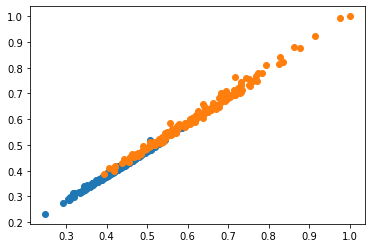

In [13]:
plt.plot(df_train_nom.mean_radius[df_train_nom.diagnosis==1], df_train_nom.mean_perimeter[df_train_nom.diagnosis==1], 'o')
plt.plot(df_train_nom.mean_radius[df_train_nom.diagnosis==0], df_train_nom.mean_perimeter[df_train_nom.diagnosis==0], 'o')
plt.show()

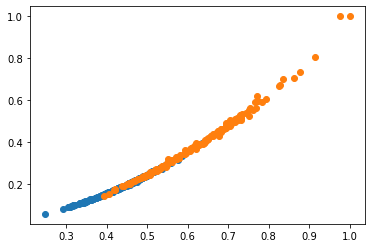

In [14]:
plt.plot(df_train_nom.mean_radius[df_train_nom.diagnosis==1], df_train_nom.mean_area[df_train_nom.diagnosis==1], 'o')
plt.plot(df_train_nom.mean_radius[df_train_nom.diagnosis==0], df_train_nom.mean_area[df_train_nom.diagnosis==0], 'o')
plt.show()

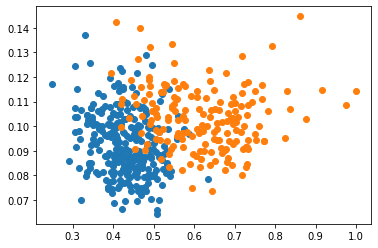

In [15]:
plt.plot(df_train_nom.mean_radius[df_train_nom.diagnosis==1], df_train_nom.mean_smoothness[df_train_nom.diagnosis==1], 'o')
plt.plot(df_train_nom.mean_radius[df_train_nom.diagnosis==0], df_train_nom.mean_smoothness[df_train_nom.diagnosis==0], 'o')
plt.show()

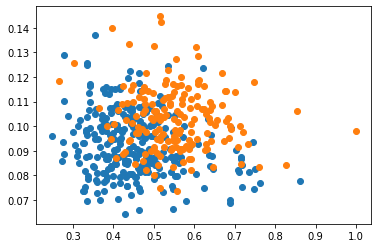

In [16]:
plt.plot(df_train_nom.mean_texture[df_train_nom.diagnosis==1], df_train_nom.mean_smoothness[df_train_nom.diagnosis==1], 'o')
plt.plot(df_train_nom.mean_texture[df_train_nom.diagnosis==0], df_train_nom.mean_smoothness[df_train_nom.diagnosis==0], 'o')
plt.show()

Axes3DSubplot(0.125,0.125;0.775x0.755)


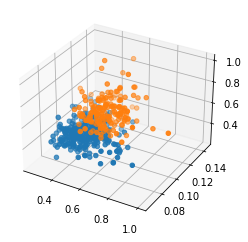

In [17]:
from mpl_toolkits import mplot3d
%matplotlib inline
ax = plt.axes(projection='3d')
ax.scatter3D(df_train_nom.mean_texture[df_train_nom.diagnosis==1], \
             df_train_nom.mean_smoothness[df_train_nom.diagnosis==1],\
             df_train_nom.mean_radius[df_train_nom.diagnosis==1] ,'o');

ax.scatter3D(df_train_nom.mean_texture[df_train_nom.diagnosis==0],\
             df_train_nom.mean_smoothness[df_train_nom.diagnosis==0],\
             df_train_nom.mean_radius[df_train_nom.diagnosis==0] ,'o');
print(ax)

In [18]:
#mean_radius mean_texture mean_perimeter mean_area mean_smoothness diagnosis
df_train_nom=df_train_nom[["mean_radius", "mean_texture","mean_smoothness","diagnosis"]]
df_train_nom_x=df_train_nom.iloc[:,:-1]
df_train_nom_y=df_train_nom[["diagnosis"]]

df_test_nom=df_test_nom[["mean_radius", "mean_texture","mean_smoothness","diagnosis"]]
df_test_nom_x=df_test_nom.iloc[:,:-1]
df_test_nom_y=df_test_nom[["diagnosis"]]

In [19]:
#Normalizar el dataset en conjunto
df_nom=norm(df,max_radius,max_texture,max_perimeter,max_area)

#Separando el dataset en x e y
df_nom=df_nom[["mean_radius", "mean_texture","mean_smoothness","diagnosis"]]
df_nom_x=df_nom.iloc[:,:-1]
df_nom_y=df[["diagnosis"]]

In [20]:
#Separando el dataset en x e y
df_2=df[["mean_radius", "mean_texture","mean_smoothness","diagnosis"]]
df_x=df_2.iloc[:,:-1]
df_y=df[["diagnosis"]] 

In [21]:
def svmFuntion(train_x,train_y,test_x,test_y):
    clf = svm.SVC()
    clf.fit(train_x, train_y)
    result=clf.predict(test_x)
    confusion_matrix_result = confusion_matrix(result,test_y)
    TP=confusion_matrix_result[0][0]
    FP=confusion_matrix_result[0][1]
    FN=confusion_matrix_result[1][0]
    TN=confusion_matrix_result[1][1]
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1=(2*TP/(2*TP+FP+FN))
    return accuracy,recall,precision,f1,confusion_matrix_result

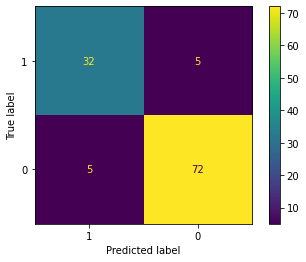

Accuracy: 0.9122807017543859
Recall: 0.8648648648648649
Precision: 0.8648648648648649
F1: 0.8648648648648649


In [22]:
svm_accuracy,svm_recall,svm_precision,svm_f1,svm_confusion_matrix_result=svmFuntion(\
                df_train_nom_x,df_train_nom_y,df_test_nom_x,df_test_nom_y);
cm_display = ConfusionMatrixDisplay(confusion_matrix = svm_confusion_matrix_result, display_labels = [1, 0])

cm_display.plot()
plt.show() 
print("Accuracy: " + str(svm_accuracy))
print("Recall: " + str(svm_recall))
print("Precision: " + str(svm_precision))
print("F1: " + str(svm_f1))

In [23]:
scoring = ['accuracy',"recall","precision","f1"]
clf = svm.SVC(kernel='linear', C=1, random_state=0)
svm_cv = cross_validate(clf, df_nom_x,df_nom_y, scoring=scoring, cv=10, return_train_score=True)

def printResult(scores):
    print("TEST mean :  ")
    print("Accuracy: " + str(scores["test_accuracy"].mean()) + " max: " + str(scores["test_accuracy"].max()))
    print("Recall: " + str(scores["test_recall"].mean()) + " max: " + str(scores["test_recall"].max()))
    print("Precision: " + str(scores["test_precision"].mean()) + " max: " + str(scores["test_precision"].max()))
    print("Specificity: " + str(scores["test_f1"].mean()) +" max: " + str(scores["test_f1"].max()))
print("Dataset normalized by colums and divide columns in X and Y using support vector machine")  
printResult(svm_cv)

Dataset normalized by colums and divide columns in X and Y using support vector machine
TEST mean :  
Accuracy: 0.8839912280701754 max: 0.9649122807017544
Recall: 0.9747619047619048 max: 1.0
Precision: 0.8640517880052764 max: 0.9722222222222222
Specificity: 0.9143397124921414 max: 0.9722222222222222


In [24]:
ss = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
aux=df_nom[["mean_radius", "mean_texture","mean_smoothness","diagnosis"]]
accuracy_svm_cv=np.array([])
recall_svm_cv=np.array([])
precision_svm_cv=np.array([])
f1_svm_cv=np.array([])
accuracy_now=0
train_in=[]
test_in=[]
for train_index, test_index in ss.split(aux):
    clf = svm.SVC(kernel='linear', C=1, random_state=0)
    acc,re,pre,f,confusion_matrix_result=svmFuntion(\
                        aux.iloc[train_index,:-1],aux.iloc[train_index,-1:],\
                        aux.iloc[test_index,:-1],aux.iloc[test_index,-1:]) 
    if (accuracy_now<acc):
        train_in = train_index
        test_in = test_index
    accuracy_svm_cv=np.append(accuracy_svm_cv, acc)
    recall_svm_cv=np.append(recall_svm_cv, re)
    precision_svm_cv=np.append(precision_svm_cv, pre)
    f1_svm_cv=np.append(f1_svm_cv, f)

print("Accuracy: "+ str(accuracy_svm_cv.mean()) + " max: " + str(accuracy_svm_cv.max()) )
print("Recall: "+ str(recall_svm_cv.mean()) + " max: " + str(recall_svm_cv.max()) )
print("Precision: "+ str(precision_svm_cv.mean()) + " max: " + str(precision_svm_cv.max()) )
print("F1: "+ str(f1_svm_cv.mean()) + " max: " + str(f1_svm_cv.max()) )

Accuracy: 0.9149122807017545 max: 0.9473684210526315
Recall: 0.8525690250085363 max: 0.9130434782608695
Precision: 0.9193428338614474 max: 1.0
F1: 0.8826663593397498 max: 0.9302325581395349


In [25]:
def lr_fun(train_x,train_y,test_x,test_y):
    reg = LogisticRegression().fit(train_x, train_y)
    lr_result=reg.predict(test_x)
    confusion_matrix_result = confusion_matrix(lr_result,test_y)
    TP=confusion_matrix_result[0][0]
    FP=confusion_matrix_result[0][1]
    FN=confusion_matrix_result[1][0]
    TN=confusion_matrix_result[1][1]
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1=(2*TP/(2*TP+FP+FN))
    return accuracy,recall,precision,f1,confusion_matrix_result

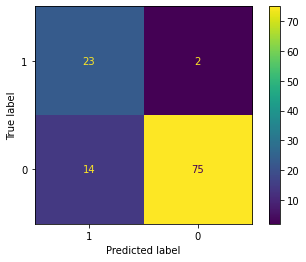

Accuracy: 0.8596491228070176
Recall: 0.6216216216216216
Precision: 0.92
F1: 0.7419354838709677


In [26]:
lr_accuracy,lr_recall,lr_precision,lr_f1,lr_confusion_matrix_result=lr_fun(\
            df_train_nom_x,df_train_nom_y,df_test_nom_x,df_test_nom_y)
cm_display = ConfusionMatrixDisplay(confusion_matrix = lr_confusion_matrix_result, display_labels = [1, 0])
cm_display.plot()
plt.show() 
print("Accuracy: " + str(lr_accuracy))
print("Recall: " + str(lr_recall))
print("Precision: " + str(lr_precision))
print("F1: " + str(lr_f1))

In [27]:
scoring = ['accuracy',"recall","precision","f1"]
clf = LogisticRegression()
lr_cv = cross_validate(clf, df_nom_x,df_nom_y, scoring=scoring, cv=10, return_train_score=True)

print("Dataset normalized by colums and divide columns in X and Y using llogistic regression")  
printResult(lr_cv)

Dataset normalized by colums and divide columns in X and Y using llogistic regression
TEST mean :  
Accuracy: 0.8540726817042608 max: 0.9122807017543859
Recall: 0.9661904761904763 max: 1.0
Precision: 0.8335405973256897 max: 0.8974358974358975
Specificity: 0.8928557306718726 max: 0.9350649350649352


In [28]:
ss = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
aux=df_nom[["mean_radius", "mean_texture","mean_smoothness","diagnosis"]]
accuracy_lr_cv=np.array([])
recall_lr_cv=np.array([])
precision_lr_cv=np.array([])
f1_lr_cv=np.array([])
for train_index, test_index in ss.split(aux):
    clf = LogisticRegression()
    acc,re,pre,f,confusion_matrix_result=lr_fun(\
                        aux.iloc[train_index,:-1],aux.iloc[train_index,-1:],\
                        aux.iloc[test_index,:-1],aux.iloc[test_index,-1:]) 
    #cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = [1, 0])
    #cm_display.plot()
    #plt.show() 
    accuracy_lr_cv=np.append(accuracy_lr_cv, acc)
    recall_lr_cv=np.append(recall_lr_cv, re)
    precision_lr_cv=np.append(precision_lr_cv, pre)
    f1_lr_cv=np.append(f1_lr_cv, f)

print("Accuracy: "+ str(accuracy_lr_cv.mean()) + " max: " + str(accuracy_lr_cv.max()) )
print("Recall: "+ str(recall_lr_cv.mean()) + " max: " + str(recall_lr_cv.max()) )
print("Precision: "+ str(precision_lr_cv.mean()) + " max: " + str(precision_lr_cv.max()) )
print("F1: "+ str(f1_lr_cv.mean()) + " max: " + str(f1_lr_cv.max()) )


Accuracy: 0.8666666666666668 max: 0.9122807017543859
Recall: 0.6750731661319341 max: 0.7894736842105263
Precision: 0.9648877056851195 max: 1.0
F1: 0.7923945350290017 max: 0.8571428571428571


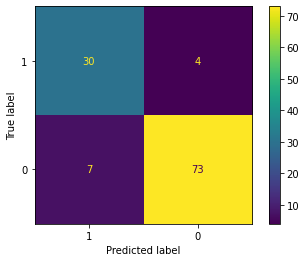

Accuracy: 0.9035087719298246
Recall: 0.8108108108108109
Precision: 0.8823529411764706
F1: 0.8450704225352113


In [29]:
train[["mean_radius", "mean_texture","mean_smoothness","diagnosis"]]
test[["mean_radius", "mean_texture","mean_smoothness","diagnosis"]]

kmeans = KMeans(n_clusters=2, random_state=11).fit(\
            train[["mean_radius", "mean_texture","mean_smoothness"]])
kmeans_result=kmeans.predict(test[["mean_radius", "mean_texture","mean_smoothness"]])

for inde,k in enumerate(kmeans_result):
    if kmeans_result[inde]== 0:
        kmeans_result[inde]=1
    else:
        kmeans_result[inde]=0
    
confusion_matrix_result = confusion_matrix(kmeans_result,test[["diagnosis"]])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = [1, 0])
cm_display.plot()
plt.show() 
#kmeans = KMeans(n_clusters=2, random_state=0).fit(df_nom_x)
#kmeans.labels_
TP=confusion_matrix_result[0][0]
FP=confusion_matrix_result[0][1]
FN=confusion_matrix_result[1][0]
TN=confusion_matrix_result[1][1]
kmeans_accuracy=(TP+TN)/(TP+TN+FP+FN)
kmeans_recall=TP/(TP+FN)
kmeans_precision=TP/(TP+FP)
kmeans_f1=(2*TP/(2*TP+FP+FN))
print("Accuracy: " + str(kmeans_accuracy))
print("Recall: " + str(kmeans_recall))
print("Precision: " + str(kmeans_precision))
print("F1: " + str(kmeans_f1))

In [30]:
svm_cv
accuracy_svm_cv
recall_svm_cv
precision_svm_cv
f1_svm_cv


lr_cv
accuracy_lr_cv
recall_lr_cv
precision_lr_cv
f1_lr_cv

kmeans_accuracy
kmeans_recall
kmeans_precision
kmeans_f1

0.8450704225352113

In [31]:
table = [['Model', 'Accuracy Mean','Recall Mean','Precision Mean','f1-score Mean'],\
         ['Support Vector Machine', svm_accuracy, svm_recall,svm_precision,svm_f1],
         ['Support Vector Machine cv', svm_cv['test_accuracy'].mean(),
          svm_cv['test_recall'].mean(),
          svm_cv['test_precision'].mean(),
          svm_cv['test_f1'].mean()],
         ['Support Vector Machine cv ShuffleSplit', accuracy_svm_cv.mean(), 
          recall_svm_cv.mean(),
          precision_svm_cv.mean(),
          f1_svm_cv.mean()],
         ['Linear Regresion', lr_accuracy, lr_recall,lr_precision,lr_f1],
         ['Linear Regression cv', lr_cv['test_accuracy'].mean(), lr_cv['test_recall'].mean(),
          lr_cv['test_precision'].mean(),lr_cv['test_f1'].mean()],
         ['Linear Regression cv ShuffleSplit',
          accuracy_lr_cv.mean(),
          recall_lr_cv.mean(),
          precision_lr_cv.mean(),
          f1_lr_cv.mean()],
         ['kmeans', kmeans_accuracy,kmeans_recall,kmeans_precision,kmeans_f1]]

print(tabulate(table, headers='firstrow', tablefmt='grid'))


+----------------------------------------+-----------------+---------------+------------------+-----------------+
| Model                                  |   Accuracy Mean |   Recall Mean |   Precision Mean |   f1-score Mean |
+========================================+=================+===============+==================+=================+
| Support Vector Machine                 |        0.912281 |      0.864865 |         0.864865 |        0.864865 |
+----------------------------------------+-----------------+---------------+------------------+-----------------+
| Support Vector Machine cv              |        0.883991 |      0.974762 |         0.864052 |        0.91434  |
+----------------------------------------+-----------------+---------------+------------------+-----------------+
| Support Vector Machine cv ShuffleSplit |        0.914912 |      0.852569 |         0.919343 |        0.882666 |
+----------------------------------------+-----------------+---------------+------------

        svm    svm_cv  svm_cv_ss        lr     lr_cv  lr_cv_ss    kmeans
0  0.912281  0.842105   0.894737  0.859649  0.824561  0.859649  0.903509
1  0.912281  0.842105   0.938596  0.859649  0.824561  0.868421  0.903509
2  0.912281  0.842105   0.877193  0.859649  0.807018  0.868421  0.903509
3  0.912281  0.824561   0.912281  0.859649  0.824561  0.868421  0.903509
4  0.912281  0.877193   0.912281  0.859649  0.824561  0.868421  0.903509
5  0.912281  0.912281   0.894737  0.859649  0.894737  0.877193  0.903509
6  0.912281  0.929825   0.921053  0.859649  0.912281  0.912281  0.903509
7  0.912281  0.929825   0.921053  0.859649  0.894737  0.815789  0.903509
8  0.912281  0.964912   0.929825  0.859649  0.912281  0.885965  0.903509
9  0.912281  0.875000   0.947368  0.859649  0.821429  0.842105  0.903509


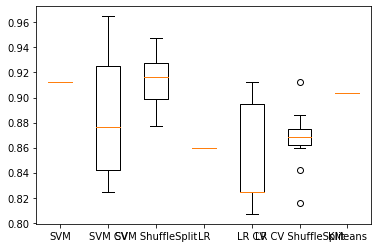

In [32]:
d = {'svm': pd.Series(svm_accuracy),
     'svm_cv': pd.Series(svm_cv['test_accuracy']),
     'svm_cv_ss': pd.Series(accuracy_svm_cv),
     'lr': pd.Series(lr_accuracy),
     'lr_cv': pd.Series(lr_cv['test_accuracy']),
     'lr_cv_ss': pd.Series(accuracy_lr_cv),
     'kmeans': pd.Series(kmeans_accuracy),
    }
d['svm']=d['svm'][0]
d['lr']=d['lr'][0]
d['kmeans']=d['kmeans'][0]
df = pd.DataFrame(d)
print(df)
plt.boxplot(df) 
plt.xticks([1, 2, 3,4,5,6,7], ['SVM','SVM CV',
                       'SVM ShuffleSplit',
                       'LR',
                       'LR CV',
                       'LR CV ShuffleSplit',
                       'KMeans'])
plt.show()

In [33]:
print(str(train_in) +" "+str(test_in))

[197 215 323 336 366 489 363 567 208 527 498 524 251 352  97 134 294 520
  22 234 426 122 462 225 206 270 408 243 235 516 244 523 316 221 528 370
 211 305  51 453  49 492 202 245  34 247 318 403 317 255 472 432 543 216
 356 443  82  11  47 261 212 499  80  99  50 541 287 480 337  72 470 220
 519 210 364 269 510 327 147 511 265 374 116 397  48  63 449 509 127  35
 441 222 427 151  64 563 419 517 232 529 446   2 109 307 198 552 260  71
 355 105 187 436 302 564 195 439 253 156 351 291 346 111 533  14  37  25
 233 332  77 473 551  38  66  85  29 452 494 345 254 430 262 334 445 170
 458 175 423 477 535  73  30 548 518 107 392 279 148 560 422 306 504 163
 290  46 389 407 312 513  84 378 304 514 130 388 298 547  87  58 102 500
 324 112 252 273 229 114 333 404 154   9 138  33  18 274 447 433 434 238
 512 165 239 117 460 292 126 268 339 343 451 293 329 538  17 242 331 326
 314 103 320  89 172 381 405   8  36 201 415 177 241 479  27 131 135  76
  21 213 358 155 180 230 566 183 128 169  40  90 18

In [34]:
final_model = svm.SVC()
final_model.fit(aux.iloc[train_in,:-1], aux.iloc[train_in,-1:])
result=final_model.predict(aux.iloc[test_in,:-1])
confusion_matrix_result = confusion_matrix(result,aux.iloc[test_in,-1:])
TP=confusion_matrix_result[0][0]
FP=confusion_matrix_result[0][1]
FN=confusion_matrix_result[1][0]
TN=confusion_matrix_result[1][1]
accuracy=(TP+TN)/(TP+TN+FP+FN)
recall=TP/(TP+FN)
precision=TP/(TP+FP)
f1=(2*TP/(2*TP+FP+FN))


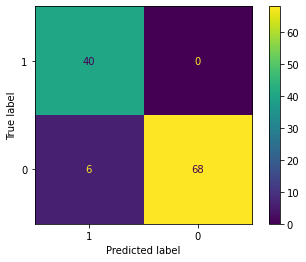

0.9473684210526315 0.8695652173913043 1.0 0.9302325581395349


In [35]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = [1, 0])
cm_display.plot()
plt.show() 
print(str(accuracy)+" "+str(recall)+" "+str(precision)+" "+str(f1))

In [36]:

Pkl_Filename = "model/Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(final_model, file)

variable={"mean_radius":max_radius,
"mean_texture":max_texture,
"mean_perimeter":max_perimeter,
"mean_area":max_area}

json_string = json.dumps(variable)
with open('model/json_data.json', 'w') as outfile:
    outfile.write(json_string)


In [40]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
    

with open('model/json_data.json') as json_file:
    numbers = json.load(json_file)


In [42]:
data={"mean_radius": [40.42],
      "mean_texture": [40.28],
      "mean_primeter": [186.9],
      "mean_area": [2501.0],
     "mean_smoothness": [0.500]}

dftry = pd.DataFrame(data)
dftry["mean_radius"]=dftry["mean_radius"]/numbers["mean_radius"]
dftry["mean_texture"]=dftry["mean_texture"]/numbers["mean_texture"]


aux=dftry[["mean_radius", "mean_texture","mean_smoothness"]]
print(dftry)

Ypredict = Pickled_LR_Model.predict(aux)  
print(Ypredict)

   mean_radius  mean_texture  mean_primeter  mean_area  mean_smoothness
0     1.437922      1.025458          186.9     2501.0              0.5
[0]
